In [1]:
#importing libraries
! pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

     |████████████████████████████████| 285 kB 16.4 MB/s eta 0:00:01


In [2]:
file=pd.read_csv("WHO COVID-19 global table data July 10th 2021 at 1.47.08 PM.csv",sep=",")

In [3]:
#file rows
file.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,185291530,2377.196364,2906590,37.290076,458355,4010834,51.456966,55457,0.711485,8516,NaN
1,United States of America,Americas,33451965,10106.250000,108004,32.630000,22569,601231,181.640000,1551,0.470000,301,Community transmission
2,India,South-East Asia,30752950,2228.470000,294699,21.350000,43393,405939,29.420000,5627,0.410000,911,Clusters of cases
3,Brazil,Americas,18909037,8895.880000,351896,165.550000,54022,528540,248.660000,10474,4.930000,1648,Community transmission
4,Russian Federation,Europe,5733218,3928.630000,171858,117.760000,25766,141501,96.960000,4936,3.380000,726,Clusters of cases


In [4]:
#Only Americas data
new_file=file.loc[(file["WHO Region"]=="Americas")]


In [5]:
#file rows
new_file.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
1,United States of America,Americas,33451965,10106.25,108004,32.63,22569,601231,181.64,1551,0.47,301,Community transmission
3,Brazil,Americas,18909037,8895.88,351896,165.55,54022,528540,248.66,10474,4.93,1648,Community transmission
8,Argentina,Americas,4593763,10164.14,123389,273.01,19423,97439,215.59,3135,6.94,456,Community transmission
9,Colombia,Americas,4426811,8700.00,185829,365.21,24229,110578,217.32,4034,7.93,559,Community transmission
15,Mexico,Americas,2558369,1984.27,39100,30.33,8507,234192,181.64,1145,0.89,234,Community transmission


In [6]:
#load file
#Renaming some columns to make it easy to read' 
new_file.rename(columns = {'Name':'Country','Cases - cumulative total':'Cases(Cum.Total)', 
                         'Cases - cumulative total per 100000 population':'Cases(Cum.Total)per 100000 population', 
                         'Cases - newly reported in last 7 days':'Cases(last 7 days)', 
                         'Cases - newly reported in last 7 days per 100000 population':'Cases(last 7 days)per 100000 population', 
                         'Cases - newly reported in last 24 hours':'Cases(last 24 hours)', 
                         'Deaths - cumulative total':'Deaths(Cum.Total)','Deaths - cumulative total per 100000 population':
                         'Deaths(Cum.Total) per 100000 population', 'Deaths reported in last 7 days':
                         'Deaths(last 7 days)','Deaths - newly reported in last 7 days per 100000 population':
                         'Deaths(last 7 days)per 100000 population','Deaths - newly reported in last 24 hours':
                         'Deaths(last 24 hours)'}, inplace = True)



/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
#data set summary
new_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1 to 220
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   56 non-null     object 
 1   WHO Region                                56 non-null     object 
 2   Cases(Cum.Total)                          56 non-null     int64  
 3   Cases(Cum.Total)per 100000 population     56 non-null     float64
 4   Cases(last 7 days)                        56 non-null     int64  
 5   Cases(last 7 days)per 100000 population   56 non-null     float64
 6   Cases(last 24 hours)                      56 non-null     int64  
 7   Deaths(Cum.Total)                         56 non-null     int64  
 8   Deaths(Cum.Total) per 100000 population   56 non-null     float64
 9   Deaths - newly reported in last 7 days    56 non-null     int64  
 10  Deaths(last 7 days)per 100000 populatio

In [8]:
#number of countries in America's region 
new_file["WHO Region"].value_counts().to_frame()

,WHO Region
Americas,56


In [9]:
#dataset description
new_file.describe()

,Cases(Cum.Total),Cases(Cum.Total)per 100000 population,Cases(last 7 days),Cases(last 7 days)per 100000 population,Cases(last 24 hours),Deaths(Cum.Total),Deaths(Cum.Total) per 100000 population,Deaths - newly reported in last 7 days,Deaths(last 7 days)per 100000 population,Deaths(last 24 hours)
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.311608e+06,4099.591964,17272.714286,90.348393,2733.410714,34481.214286,77.229286,451.392857,1.582500,70.035714
std,5.112890e+06,3312.030801,55956.745585,202.678019,8633.177160,112121.113116,95.639841,1547.820305,2.377306,240.557305
min,7.000000e+00,102.940000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.086500e+03,1395.055000,10.750000,9.005000,0.000000,17.750000,11.247500,0.000000,0.000000,0.000000
50%,1.556400e+04,3181.080000,310.000000,33.020000,25.000000,261.000000,53.310000,3.500000,0.445000,0.000000
75%,3.425358e+05,6268.192500,7568.250000,92.862500,955.500000,5968.250000,93.797500,122.250000,1.912500,18.500000
max,3.345196e+07,10785.670000,351896.000000,1465.090000,54022.000000,601231.000000,587.600000,10474.000000,10.520000,1648.000000


In [10]:
#transmission classification
new_file["Transmission Classification"].value_counts().to_frame()

,Transmission Classification
Community transmission,42
Sporadic cases,5
Clusters of cases,5
No cases,4


In [11]:
#country with highest number of deaths reported in the last 24hrs against transmission classification
death_24hrs=new_file[['Country','Deaths(last 24 hours)']]
highdeath_24hrs = death_24hrs.sort_values(by=['Deaths(last 24 hours)'], ascending= False)
# a. check first 
highdeath_24hrs.head()

,Country,Deaths(last 24 hours)
3,Brazil,1648
9,Colombia,559
8,Argentina,456
1,United States of America,301
15,Mexico,234


In [12]:
#import model library
from sklearn.linear_model import LinearRegression

In [13]:
#Using Newly reported cases in last 24 hours to predict deaths in the next 24 hours
x = new_file[['Cases(last 24 hours)']]
y = new_file['Deaths(last 24 hours)'] 
lm = LinearRegression() 
lm.fit(x,y)
lm

LinearRegression()

In [14]:
#Calculating the value of the intercept, c
lm.intercept_

-4.010264462076975

In [15]:
#Calculating the value of the slope, m
lm.coef_

array([0.02708923])

Model Formular;

In [16]:
#correlation
new_file[['Cases(last 24 hours)','Deaths(last 24 hours)']].corr()

,Cases(last 24 hours),Deaths(last 24 hours)
Cases(last 24 hours),1.000000,0.972184
Deaths(last 24 hours),0.972184,1.000000


In [17]:
import matplotlib.pyplot as plt

(0.0, 1731.0038874470122)

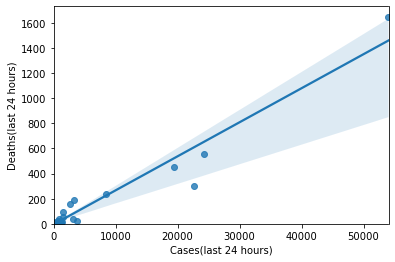

In [18]:
#simple linear regression graph
sns.regplot(x="Cases(last 24 hours)", y="Deaths(last 24 hours)", data=new_file)
plt.ylim(0,)

<AxesSubplot:xlabel='Transmission Classification', ylabel='Deaths(Cum.Total)'>

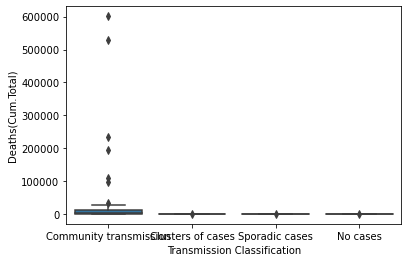

In [19]:
#plotting a box plot
sns.boxplot(x="Transmission Classification", y="Deaths(Cum.Total)", data=new_file)

Model performance evaluation metrics

In [20]:
#Calculating R-squared
print('The R-squared is: ', lm.score(x, y))

The R-squared is:  0.9451426883656249


In [21]:
#Let's import the function mean_squared_error % sqrt from the module metrics
from sklearn.metrics import mean_squared_error #for calculating MSE
from math import sqrt #for calculating RSME

In [23]:
#calculating MSE
y=lm.predict(x)
mse = mean_squared_error(new_file['Deaths(last 24 hours)'], y)
print('Mean Squared Error:', mse)

Mean Squared Error: 3117.7858489231335


In [24]:
#calculating RMSE
#since; mse=sqrt(mean_squared_error(new_file['Deaths(last 24 hours'], y))
print('Root Mean Squared Error:',sqrt(mse))

Root Mean Squared Error: 55.8371368259793


 Multiple Linear Regression

Predicting Deaths(last 24 hours) in America by looking at three variables;

1. Cases reported in the last 24 hours; Cases(last 24 hours)
2. Cases reported in the last 7 days; Cases(last 7 days) 
3. Total cumulative Cases reported; Cases(Cum.Total)



In [25]:
# assign the variables identified above; in a new dataset,z
z = new_file[['Cases(last 24 hours)','Cases(last 7 days)','Cases(Cum.Total)']]
#Fitting the linear model using the three above variables.
lm.fit(z, new_file['Deaths(last 24 hours)'])

LinearRegression()

In [26]:
#Calculating the value of the intercept, c
lm.intercept_

-3.152937889926207

In [27]:
#Calculating the value of the slope; b1,b2,b3
lm.coef_

array([ 4.70509139e-02, -2.10651332e-03, -1.45131908e-05])


Model formular;


Deaths(last 24 hours)= 4.70509139 * Cases(last 24 hours) - 2.10651332 * Cases(last 7 days) - 1.45131908 * Cases(Cum.Total) - 3.152937889926207


In [28]:
#correlation
new_file[['Cases(last 24 hours)','Cases(last 7 days)','Cases(Cum.Total)']].corr()

,Cases(last 24 hours),Cases(last 7 days),Cases(Cum.Total)
Cases(last 24 hours),1.000000,0.992458,0.745889
Cases(last 7 days),0.992458,1.000000,0.673512
Cases(Cum.Total),0.745889,0.673512,1.000000


Model performance evaluation metrics

In [29]:
#calculating R-squared
print('The R-squared is:',lm.score(z, new_file['Deaths(last 24 hours)']))

The R-squared is: 0.9707863962523477


In [30]:
#Calculating the Mean Squared Error; MSE
#prediction based on our model
y_predict_multifit = lm.predict(z)
#Now we can compare the predicted results with the actual results and print
mse=mean_squared_error(new_file['Deaths(last 24 hours)'], y_predict_multifit)
print('Mean Squared Error:',mse)

Mean Squared Error: 1660.3394815906993


In [33]:
#calculating RMSE
#since mse=mean_squared_error(new_file['Deaths(last 24 hours)'], y_predict_multifit), we call mse
print('Root Mean Squared Error:',sqrt(mse))

Root Mean Squared Error: 40.74726348591644


Conclusion


Decision making;

A model with a a high R-squared and low RMSE is the best.

From the table above, comparing the two models; Multiple Linear Regression Model is the best because it has an accuracy (R-Squared) percenatge of approximately 97.07% with a low RSME of approximately 40.7473

Therefore, The model for predicting Covid_19 daily deaths in America is;
Deaths(last 24 hours)= 4.70509139 * Cases(last 24 hours) - 2.10651332 * Cases(last 7 days) - 1.45131908 * Cases(Cum.Total) - 3.152937889926207 $$



